# -> `Importing Modules`

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q -c rapidsai -c conda-forge -c nvidia rapids=23.08 python=3.10 cudatoolkit=11.8

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...
warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
Could not solve for environment specs
The following packages are incompatible
├─ cudatoolkit 11.8**  is requested and can be installed;
└─ rapids 23.08**  is installable with the potential options
   ├─ rapids 23.08.00 would require
   │  └─ cugraph 23.08.*  with the potential options
   │     ├─ cugraph 23.08.00 would require
   │     │  └─ libcugraph 23.08.00.*  with the potential options
   │     │     ├─ libcugraph 23.08.00 would require
   │     │     │  └─ libraft-headers 23.08.*  with the potential options
   │     │     │     ├─ libraft-headers 23.08.00 would require
   │     │     │     │  └─ li

In [1]:
import cudf  # GPU version of Pandas
import cuml  # GPU ML library
from cuml.linear_model import LinearRegression
from cuml.ensemble import RandomForestClassifier

TypeError: HookspecMarker.__call__() got an unexpected keyword argument 'warn_on_impl_args'

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, roc_curve,auc, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

## 1. `Importing Dataset`

In [2]:
train_data = pd.read_csv('/kaggle/input/rainfall-prediction-15/train_data.csv')
test_data = pd.read_csv('/kaggle/input/rainfall-prediction-15/test_data.csv')

print(train_data.shape)
print(test_data.shape)

(3798, 12)
(730, 12)


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            3798 non-null   int64  
 1   pressure       3798 non-null   float64
 2   maxtemp        3798 non-null   float64
 3   temparature    3798 non-null   float64
 4   mintemp        3798 non-null   float64
 5   dewpoint       3798 non-null   float64
 6   humidity       3798 non-null   float64
 7   cloud          3798 non-null   float64
 8   sunshine       3798 non-null   float64
 9   winddirection  3798 non-null   float64
 10  windspeed      3798 non-null   float64
 11  rainfall       3798 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 356.2 KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  730 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [5]:
train_null_cols = list(train_data.isnull().sum()[train_data.isnull().sum() > 0].index)
train_null_cols

[]

In [6]:
train_data[train_null_cols] = train_data[train_null_cols].fillna(train_data[train_null_cols].mean())

In [7]:
test_null_cols = list(test_data.isnull().sum()[test_data.isnull().sum() > 0].index)
test_null_cols

[]

In [8]:
test_data[test_null_cols] = test_data[test_null_cols].fillna(test_data[test_null_cols].mean())

## 2. `Splitting Dataset`|

In [9]:
columns = list(train_data.columns); columns.remove('rainfall')
X, Y = train_data[columns], train_data['rainfall']

In [10]:
len(columns)

11

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, shuffle = True, stratify = Y)

In [12]:
X_train.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
3500,282,1016.403779,27.767072,25.230365,23.411337,20.777194,81.367072,79.835360,4.772198,86.329280,31.298916
1412,318,1018.900000,24.800000,22.300000,20.700000,20.800000,91.000000,93.000000,0.000000,40.000000,13.700000
1933,109,1012.000000,28.600000,26.500000,25.500000,23.100000,88.000000,84.000000,1.100000,80.000000,13.000000
205,206,1008.900000,29.400000,27.200000,26.600000,25.600000,89.000000,83.000000,0.300000,180.000000,10.000000
2945,50,1021.017055,22.774972,19.541971,17.711960,9.734994,78.009966,51.630123,10.333001,23.300112,24.428018


In [13]:
y_train.head()

3500    0
1412    1
1933    1
205     1
2945    0
Name: rainfall, dtype: int64

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2848, 11)
(950, 11)
(2848,)
(950,)


In [15]:
print(X.dtypes) 
print(Y.dtypes)

day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object
int64


## 3. `Model Training`

In [26]:
model = ExtraTreesClassifier()

params = {
    "n_estimators":(100, 1000, 100),
    "criterion":["gini", "entropy", "log_loss"],
    "max_depth":range(1,100, 10),
    "max_features":["sqrt", "log2", None],
    "max_leaf_nodes":range(1, 10, 1),
    "class_weight":["balanced", "balanced_subsample"],
}

gs = GridSearchCV(estimator = model, param_grid = params, cv = 5, n_jobs = -1, verbose = 10)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


KeyboardInterrupt: 


Evaluating LogisticRegression...
Accuracy:  0.8232
Precision: 0.8101
Recall:    0.8442
F1 Score:  0.8268
AUC-ROC:   0.9000


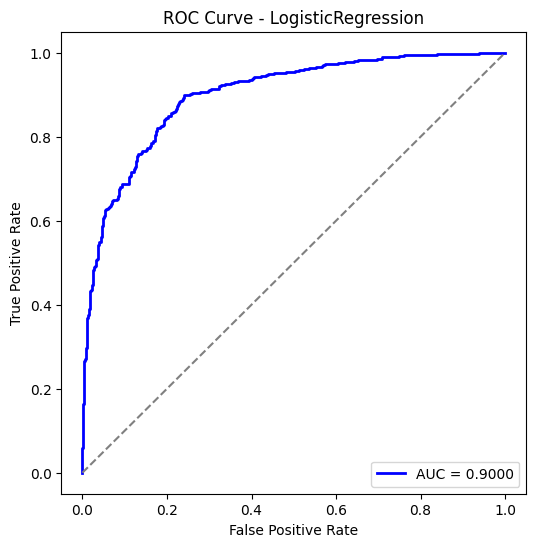


Evaluating ExtraTreesClassifier...
Accuracy:  0.9179
Precision: 0.9287
Recall:    0.9053
F1 Score:  0.9168
AUC-ROC:   0.9793


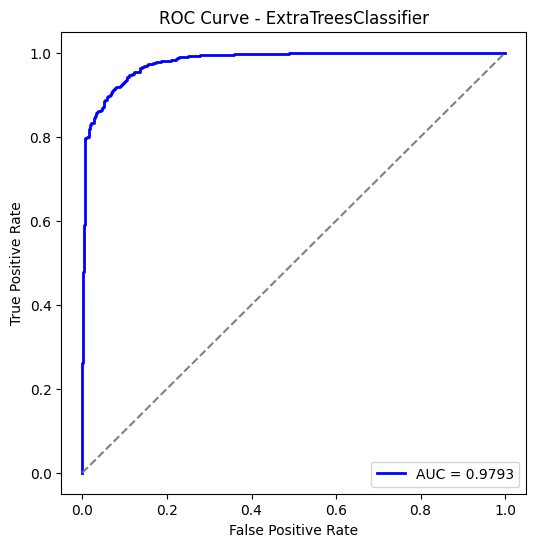

In [23]:
for name, model_data in best_models.items():
    model = model_data
    print(f"\nEvaluating {name}...")

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    
    # ROC-AUC Curve
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC-ROC:   {roc_auc:.4f}")

        # Plot ROC Curve
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()

## 5. `Saving Submissions`

In [19]:
test_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [20]:
submission_pd = pd.DataFrame({'id' : test_data['id'], 'rainfall' : best_models['ExtraTreesClassifier'].predict(test_data.drop(columns = ['id']))})
submission_pd.to_csv(f'./submission_etc_{auc(fpr, tpr):.4f}.csv', index = False)

In [21]:
submission_pd

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1
